h_list [1.0, 1.5, 1.5, 1.0, 3.0, 0.5]
b_list [-12.0, 12.0, -16.0, 3.0, -5.0, -12.0]
u_list [5.0, 5.55, 4.594594594594595, 7.7823529411764705, 5.843537414965986]
v_list [24.0, -35.2, 28.513513513513516, -14.205882352941178, -1.5238095238095228]
z_list [0, 7.236321303841677, -8.121071012805588, 6.581296080714009, -1.7248738843616611, -0.26076833527357374, 0]
A [1.2060535506402794, -1.7063769240719182, 1.6335963437243997, -1.3843616608459448, 0.0813391971715604, 0.08692277842452457]
B [0.0, 3.6181606519208387, -4.060535506402794, 3.2906480403570044, -0.8624369421808306, -0.13038416763678687]
C [-3.2060535506402794, 0.4121071012805584, -0.25145518044237436, -1.4062863795110592, 1.0219247186651148, -1.9565386107877376]


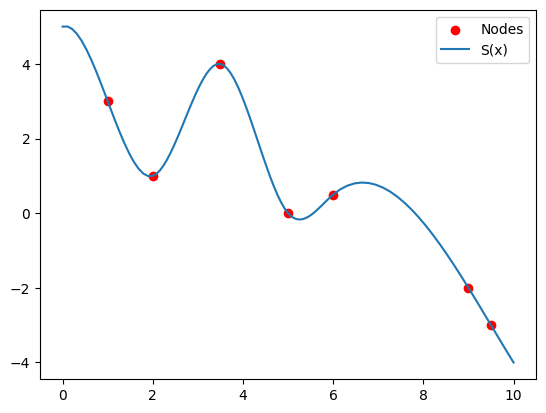

In [1]:
import numpy as np
import matplotlib.pyplot as plt

list = []

data = np.array([[1.0, 3.0],
                 [2.0, 1.0],
                 [3.5, 4.0],
                 [5.0, 0.0],
                 [6.0, 0.5],
                 [9.0, -2.0],
                 [9.5, -3.0]])

t_space, y_space = data[:, 0], data[:, 1]

n = len(t_space)
m = len(y_space)
h_list = []
for i in range(n-1):
    h_i = t_space[i+1] - t_space[i]
    h_list.append(h_i)
print('h_list', h_list)

b_list = []
for i in range(m-1):
    b_i = (6/(h_list[i])) * (y_space[i+1] - y_space[i])
    b_list.append(b_i)
print('b_list', b_list)

u_list = []
for i in range(1, n-1):
    if i == 1:
        u_i = 2*(h_list[0] + h_list[1])
    else:
        u_i = 2*(h_list[i-1] + h_list[i]) - ((h_list[i-1])**2/u_list[i-2])
    u_list.append(u_i)
print('u_list', u_list)

v_list = []
for i in range(1, n-1):
    if i == 1:
        v_i = b_list[1] - b_list[0]
    else:
        v_i = b_list[i] - b_list[i-1] - ((h_list[i-1]*v_list[i-2])/u_list[i-2])
    v_list.append(v_i)
print('v_list', v_list)

z_list = [0] * n
z_list[-1] = 0
for i in range(n-2, 0, -1):
    z_i = (1/u_list[i-1]) * (v_list[i-1] - h_list[i] * z_list[i+1])
    z_list[i] = z_i
print('z_list', z_list)

A = []
for i in range(n-1):
    A_i = (1/(6*h_list[i])) * (z_list[i+1] - z_list[i])
    A.append(A_i)
print('A', A)

B = []
for i in range(n-1):
    B_i = z_list[i]/2
    B.append(B_i)
print('B', B)

C = []
for i in range(n-1):
    C_i = (-(h_list[i]/6)*(z_list[i+1]+2*z_list[i])) + (1/h_list[i])*(y_space[i+1]-y_space[i])
    C.append(C_i)
print('C', C)

interpolated = []
x_space = []

def S_i(x, i):
    return y_space[i] + (x - t_space[i]) * (C[i] + (x - t_space[i]) * (B[i] + (x - t_space[i]) * A[i]))

for i in range(n-1):
    if i == 0:
        x = np.linspace(0, t_space[1], 20)
        x_space.extend(x)
        interpolated.extend(S_i(x,i))
    elif i == n-2:
        x = np.linspace(t_space[i], 10, 20)
        x_space.extend(x)
        interpolated.extend(S_i(x,i))
    else:
        x = np.linspace(t_space[i], t_space[i+1], 20)
        x_space.extend(x)
        interpolated.extend(S_i(x,i))


plt.scatter(t_space, y_space, color='red', label='Nodes')
plt.plot(x_space, interpolated, label='S(x)')
plt.legend()
plt.show()

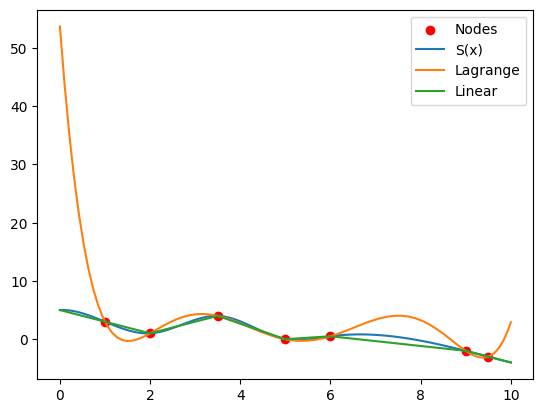

In [9]:
def lagrange(x):
    suma = 0
    for i in range(0, n):
        iloczyn = 1
        for j in range(0, n):
            if j != i:
                iloczyn *= (x - t_space[j])/(t_space[i] - t_space[j])
        suma += y_space[i] * iloczyn
    return suma

lagrange_interpolated = []
for x in x_space:
    lagrange_interpolated.append(lagrange(x))

def linear(x):
  return ((y_space[i+1] - y_space[i])/(t_space[i+1] - t_space[i]))*(x - t_space[i]) + y_space[i]

linears = []
for i in range(n-1):
    if i == 0:
        x = np.linspace(0, t_space[1], 20)
        linears.extend(linear(x))
    elif i == n-2:
        x = np.linspace(t_space[i], 10, 20)
        linears.extend(linear(x))
    else:
        x = np.linspace(t_space[i], t_space[i+1], 20)
        linears.extend(linear(x))

plt.scatter(t_space, y_space, color='red', label='Nodes')
plt.plot(x_space, interpolated, label='S(x)')
plt.plot(x_space, lagrange_interpolated, label='Lagrange')
plt.plot(x_space, linears, label='Linear')
plt.legend()
plt.show()

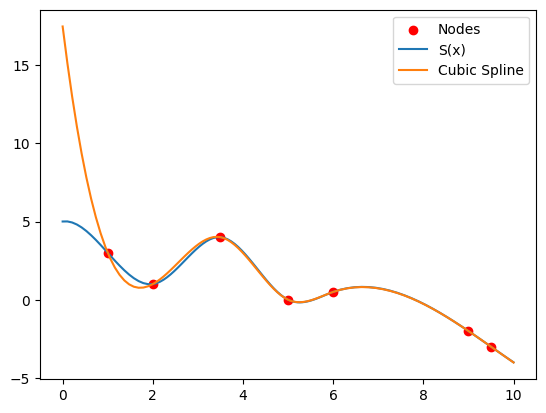

In [15]:
from  scipy.interpolate import CubicSpline
CubicSpline(t_space, y_space)
cs = CubicSpline(t_space, y_space)

plt.scatter(t_space, y_space, color='red', label='Nodes')
plt.plot(x_space, interpolated, label='S(x)')
plt.plot(x_space, cs(x_space), label='Cubic Spline')
plt.legend()
plt.show()